In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", None)

## EDA Runtime Minutes
#### Goals

Runtime minutes are the average minutes for each episode for each show.

- Get descriptive statistics for the runtime minutes of tv shows for each streaming service.

- Plot data.

- Compare findings.

-----

### 1. Netflix
#### i. Import data

In [2]:
netflix = pd.read_pickle("../Data/netflix_final_clean.pkl")

netflix.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,Breaking Bad,2008,18.0,9.5,tt0903747,tvSeries,Breaking Bad,Breaking Bad,2008.0,2008.0,49.0,"Crime,Drama,Thriller"
1,Stranger Things,2016,16.0,8.8,tt4574334,tvSeries,Stranger Things,Stranger Things,2016.0,2016.0,51.0,"Drama,Fantasy,Horror"
2,Sherlock,2010,16.0,9.1,tt1475582,tvSeries,Sherlock,Sherlock,2010.0,2010.0,88.0,"Crime,Drama,Mystery"
3,Better Call Saul,2015,18.0,8.7,tt3032476,tvSeries,Better Call Saul,Better Call Saul,2015.0,2015.0,46.0,"Crime,Drama"
4,The Office,2005,16.0,8.9,tt0386676,tvSeries,The Office,The Office,2005.0,2005.0,22.0,Comedy


First, we will look at what are the longest runtime minutes.

In [3]:
netflix["runtimeMinutes"].sort_values(ascending=False).head(20)

83      990.0
1297    853.0
1267    624.0
508     542.0
70      403.0
120     403.0
1373    397.0
46      385.0
368     378.0
283     360.0
591     360.0
471     360.0
957     354.0
297     331.0
34      317.0
777     312.0
270     306.0
509     300.0
31      296.0
457     290.0
Name: runtimeMinutes, dtype: float64

Some values from runtime minutes are taking into account all the episodes of the series, this could skew our values and not give us meaningful information. We will remove shows with runtime minutes higher than 100 from our data frame for this analysis for all streaming services.

We will also remove null values.

In [4]:
netflix_runtime = netflix[netflix["runtimeMinutes"] <= 100][["show", "runtimeMinutes"]].reset_index(drop=True)

netflix_runtime = netflix_runtime[~netflix_runtime["runtimeMinutes"].isna()].reset_index(drop=True)

netflix_runtime.head()

,show,runtimeMinutes
0,Breaking Bad,49.0
1,Stranger Things,51.0
2,Sherlock,88.0
3,Better Call Saul,46.0
4,The Office,22.0


In [5]:
len(netflix_runtime) / len(netflix)

0.7226634086744044

We will be working with 72% of our data.

#### ii. Descriptive Statistics

In [6]:
netflix_runtime["runtimeMinutes"].describe()

count    1183.000000
mean       41.552832
std        17.367396
min         3.000000
25%        26.000000
50%        43.000000
75%        59.000000
max       100.000000
Name: runtimeMinutes, dtype: float64

From the descriptive statistics we can see the following:

- The tv shows provided by netflix last in average 41 minutes per episode.
- 25% of the tv shows last 26 minutes or less.
- 50% of the tv shows last 43 minutes or more.
- 25% of the tv shows last 59 minutes or more.
- The minimum is of 3 minutes and the highest, as defined before, is of 100 minutes.

#### ii. Plotting


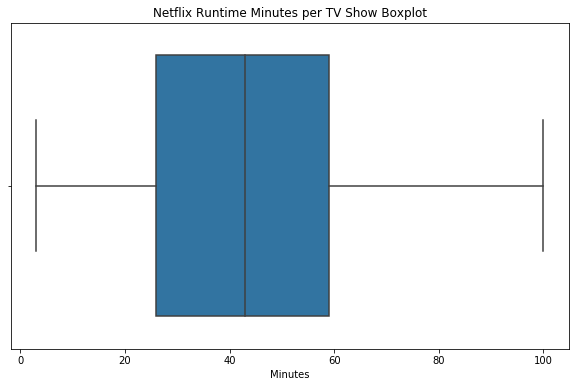

In [7]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(netflix_runtime["runtimeMinutes"])
ax.set_title("Netflix Runtime Minutes per TV Show Boxplot")
ax.set_xlabel("Minutes");

We can see from the boxplot above that most of Netflix's TV shows last from 25 minutes to 60 minutes, with a median of 43 minutes.

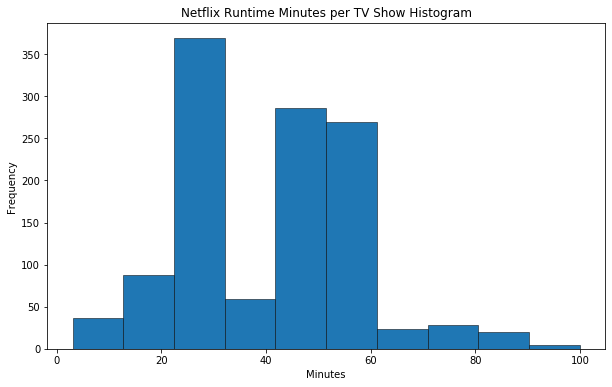

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(netflix_runtime["runtimeMinutes"], ec="black", lw=0.5)
ax.set_title("Netflix Runtime Minutes per TV Show Histogram")
ax.set_xlabel("Minutes")
ax.set_ylabel("Frequency");

From the histogram we can see that most of the TV shows last between 20 and 30 minutes, followed by 40 to 60 minutes.

-------

### 2. Amazon
#### i. Import data

In [9]:
amazon = pd.read_pickle(path + "Data/amazon_final_clean.pkl")

amazon.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,The Wire,2002,18.0,9.3,tt0306414,tvSeries,The Wire,The Wire,2002.0,2002.0,59.0,"Crime,Drama,Thriller"
1,The Sopranos,1999,18.0,9.2,tt0141842,tvSeries,The Sopranos,The Sopranos,1999.0,1999.0,55.0,"Crime,Drama"
2,Band of Brothers,2001,18.0,9.4,tt0185906,tvMiniSeries,Band of Brothers,Band of Brothers,2001.0,2001.0,594.0,"Action,Drama,History"
3,Vikings,2013,18.0,8.6,tt2306299,tvSeries,Vikings,Vikings,2013.0,2013.0,44.0,"Action,Adventure,Drama"
4,Mr. Robot,2015,18.0,8.5,tt4158110,tvSeries,Mr. Robot,Mr. Robot,2015.0,2015.0,49.0,"Crime,Drama,Thriller"


In [10]:
amazon_runtime = amazon[amazon["runtimeMinutes"] <= 100][["show", "runtimeMinutes"]].reset_index(drop=True)

amazon_runtime = amazon_runtime[~amazon_runtime["runtimeMinutes"].isna()].reset_index(drop=True)

amazon_runtime.head()

,show,runtimeMinutes
0,The Wire,59.0
1,The Sopranos,55.0
2,Vikings,44.0
3,Mr. Robot,49.0
4,Parks and Recreation,22.0


In [11]:
len(amazon_runtime) / len(amazon)

0.6565891472868217

We will be working with 65% of our data.

#### ii. Descriptive Statistics

In [12]:
amazon_runtime["runtimeMinutes"].describe()

count    847.000000
mean      39.780401
std       17.463408
min        2.000000
25%       26.000000
50%       40.000000
75%       60.000000
max      100.000000
Name: runtimeMinutes, dtype: float64

From the descriptive statistics we can see the following:

- The tv shows provided by amazon last in average 39 minutes per episode.
- 25% of the tv shows last 26 minutes or less.
- 50% of the tv shows last 40 minutes or more.
- 25% of the tv shows last 60 minutes or more.
- The minimum is of 2 minutes and the highest, as defined before, is of 100 minutes.

#### ii. Plotting


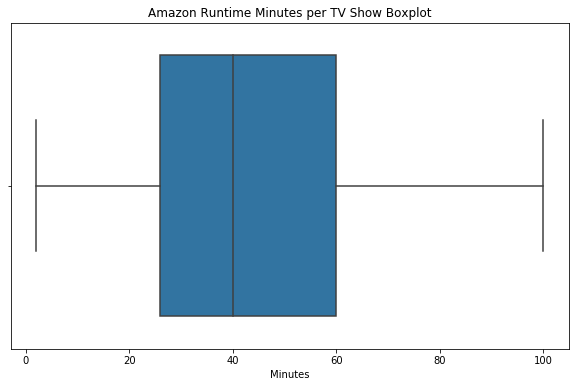

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(amazon_runtime["runtimeMinutes"])
ax.set_title("Amazon Runtime Minutes per TV Show Boxplot")
ax.set_xlabel("Minutes");

We can see from the boxplot above that most of Amazon's TV shows last from 23 minutes to 60 minutes, similar to Netflix, with a median of 40 minutes.

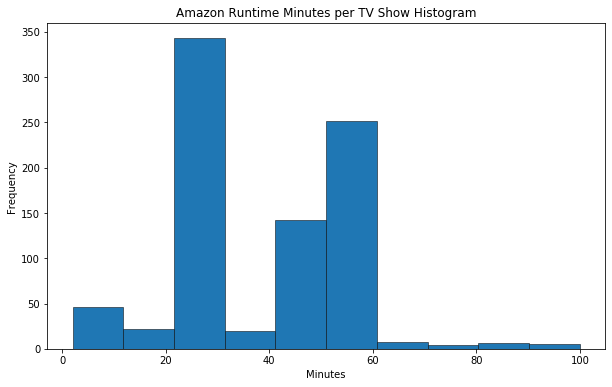

In [14]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(amazon_runtime["runtimeMinutes"], ec="black", lw=0.5)
ax.set_title("Amazon Runtime Minutes per TV Show Histogram")
ax.set_xlabel("Minutes")
ax.set_ylabel("Frequency");

From the histogram we can see that most of the TV shows last between 20 and 30 minutes, followed by 50 to 60 minutes. Similar to Netflix.

-------

### 3. HBO
#### i. Import data

In [15]:
hbo = pd.read_pickle(path + "Data/hbo_final_clean.pkl")

hbo.head()

,show,year,age,imdb_rating,imdb_id,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,Game of Thrones,2011,18.0,9.3,tt0944947,tt0944947,tvSeries,Game of Thrones,Game of Thrones,2011.0,2011.0,57.0,"Action,Adventure,Drama"
1,The Wire,2002,18.0,9.3,tt0306414,tt0306414,tvSeries,The Wire,The Wire,2002.0,2002.0,59.0,"Crime,Drama,Thriller"
2,Chernobyl,2019,18.0,9.4,tt7366338,tt7366338,tvMiniSeries,Chernobyl,Chernobyl,2019.0,2019.0,330.0,"Drama,History,Thriller"
3,The Sopranos,1999,18.0,9.2,tt0141842,tt0141842,tvSeries,The Sopranos,The Sopranos,1999.0,1999.0,55.0,"Crime,Drama"
4,Band of Brothers,2001,18.0,9.4,tt0185906,tt0185906,tvMiniSeries,Band of Brothers,Band of Brothers,2001.0,2001.0,594.0,"Action,Drama,History"


In [16]:
hbo_runtime = hbo[hbo["runtimeMinutes"] <= 100][["show", "runtimeMinutes"]].reset_index(drop=True)

hbo_runtime = hbo_runtime[~hbo_runtime["runtimeMinutes"].isna()].reset_index(drop=True)

hbo_runtime.head()

,show,runtimeMinutes
0,Game of Thrones,57.0
1,The Wire,59.0
2,The Sopranos,55.0
3,Westworld,62.0
4,True Detective,55.0


In [17]:
len(hbo_runtime) / len(hbo)

0.75

We will be working with 75% of our data.

#### ii. Descriptive Statistics

In [18]:
hbo_runtime["runtimeMinutes"].describe()

count    129.00000
mean      42.03876
std       14.68439
min       11.00000
25%       30.00000
50%       30.00000
75%       59.00000
max       71.00000
Name: runtimeMinutes, dtype: float64

From the descriptive statistics we can see the following:

- The tv shows provided by hbo last in average 42 minutes per episode.
- 50% of the tv shows last 30 minutes or less.
- 25% of the tv shows last 59 minutes or more.
- The minimum is of 11 minutes and the highest is of 71 minutes.

#### ii. Plotting

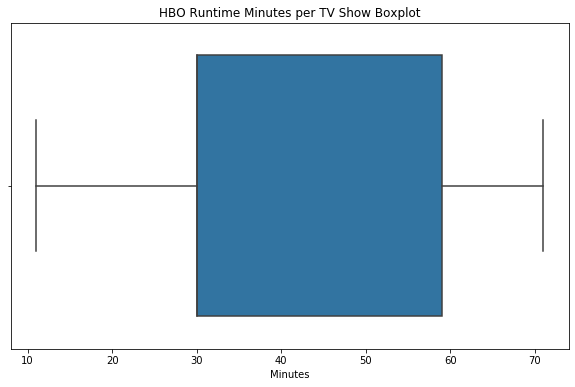

In [19]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(hbo_runtime["runtimeMinutes"])
ax.set_title("HBO Runtime Minutes per TV Show Boxplot")
ax.set_xlabel("Minutes");

We can see from the boxplot above that most of HBO's TV shows last from 30 minutes to 58 minutes, with a median of 30 minutes.

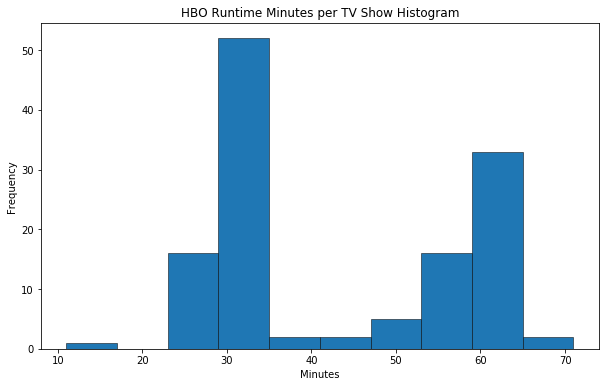

In [20]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(hbo_runtime["runtimeMinutes"], ec="black", lw=0.5)
ax.set_title("HBO Runtime Minutes per TV Show Histogram")
ax.set_xlabel("Minutes")
ax.set_ylabel("Frequency");

From the histogram we can see that most of the TV shows last between 30 and 35 minutes, followed by 60 to 65 minutes, a little bit higher values than for Netflix and Amazon.


-----

### 4. Comparison

#### i. Normalize data

In order to make a comparison, we must normalize the data for each streaming service.
We will do this first by dividing the data into bins of 5 minutes, starting from 0 to 100, and then getting the ratio of frequency for each bin and the total number of tv shows.

**Netflix**

In [21]:
# use pandas cut method to create a new column with the year range

netflix_runtime["minutes_range"] = pd.cut(netflix_runtime["runtimeMinutes"], bins=[i for i in range(0,105,5)])

netflix_runtime.head()

,show,runtimeMinutes,minutes_range
0,Breaking Bad,49.0,"(45, 50]"
1,Stranger Things,51.0,"(50, 55]"
2,Sherlock,88.0,"(85, 90]"
3,Better Call Saul,46.0,"(45, 50]"
4,The Office,22.0,"(20, 25]"


In [22]:
# group by year_range using count as an aggregate function

netflix_runtime_range = (netflix_runtime.groupby("minutes_range")
                         .agg({"show":"count"})
                         .reset_index()
                         .rename(columns={"show":"frequency"}))

# create normalize column which divides frequency by the total tv shows

netflix_runtime_range["normalize"] = round(((netflix_runtime_range["frequency"] / netflix_runtime_range["frequency"].sum()) * 100)
                                         , 2)

# add column to specify streaming service

netflix_runtime_range["streaming_service"] = "Netflix"

netflix_runtime_range.head()

,minutes_range,frequency,normalize,streaming_service
0,"(0, 5]",4,0.34,Netflix
1,"(5, 10]",16,1.35,Netflix
2,"(10, 15]",30,2.54,Netflix
3,"(15, 20]",12,1.01,Netflix
4,"(20, 25]",221,18.68,Netflix


**Amazon**

In [23]:
amazon_runtime["minutes_range"] = pd.cut(amazon_runtime["runtimeMinutes"], bins=[i for i in range(0,105,5)])

amazon_runtime.head()

,show,runtimeMinutes,minutes_range
0,The Wire,59.0,"(55, 60]"
1,The Sopranos,55.0,"(50, 55]"
2,Vikings,44.0,"(40, 45]"
3,Mr. Robot,49.0,"(45, 50]"
4,Parks and Recreation,22.0,"(20, 25]"


In [24]:
amazon_runtime_range = (amazon_runtime.groupby("minutes_range")
                         .agg({"show":"count"})
                         .reset_index()
                         .rename(columns={"show":"frequency"}))

amazon_runtime_range["normalize"] = round(((amazon_runtime_range["frequency"] / amazon_runtime_range["frequency"].sum()) * 100)
                                         , 2)

amazon_runtime_range["streaming_service"] = "Amazon"

amazon_runtime_range.head()

,minutes_range,frequency,normalize,streaming_service
0,"(0, 5]",15,1.77,Amazon
1,"(5, 10]",23,2.72,Amazon
2,"(10, 15]",22,2.60,Amazon
3,"(15, 20]",5,0.59,Amazon
4,"(20, 25]",145,17.12,Amazon


**HBO**

In [25]:
hbo_runtime["minutes_range"] = pd.cut(hbo_runtime["runtimeMinutes"], bins=[i for i in range(0,105,5)])

hbo_runtime.head()

,show,runtimeMinutes,minutes_range
0,Game of Thrones,57.0,"(55, 60]"
1,The Wire,59.0,"(55, 60]"
2,The Sopranos,55.0,"(50, 55]"
3,Westworld,62.0,"(60, 65]"
4,True Detective,55.0,"(50, 55]"


In [26]:
hbo_runtime_range = (hbo_runtime.groupby("minutes_range")
                         .agg({"show":"count"})
                         .reset_index()
                         .rename(columns={"show":"frequency"}))

hbo_runtime_range["normalize"] = round(((hbo_runtime_range["frequency"] / hbo_runtime_range["frequency"].sum()) * 100)
                                         , 2)

hbo_runtime_range["streaming_service"] = "HBO"

hbo_runtime_range.head()

,minutes_range,frequency,normalize,streaming_service
0,"(0, 5]",0,0.00,HBO
1,"(5, 10]",0,0.00,HBO
2,"(10, 15]",1,0.78,HBO
3,"(15, 20]",0,0.00,HBO
4,"(20, 25]",3,2.33,HBO


#### ii. Combine data frames

In [27]:
minutes_range = netflix_runtime_range.append(amazon_runtime_range).append(hbo_runtime_range).reset_index(drop=True)

minutes_range

,minutes_range,frequency,normalize,streaming_service
0,"(0, 5]",4,0.34,Netflix
1,"(5, 10]",16,1.35,Netflix
2,"(10, 15]",30,2.54,Netflix
3,"(15, 20]",12,1.01,Netflix
4,"(20, 25]",221,18.68,Netflix
5,"(25, 30]",206,17.41,Netflix
6,"(30, 35]",16,1.35,Netflix
7,"(35, 40]",39,3.30,Netflix
8,"(40, 45]",204,17.24,Netflix
9,"(45, 50]",86,7.27,Netflix


#### iii. Plotting

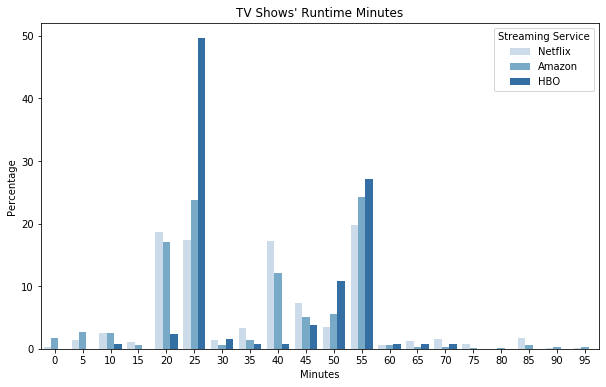

In [28]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x=minutes_range["minutes_range"]
            , y=minutes_range["normalize"]
            , hue=minutes_range["streaming_service"]
            , palette="Blues"
           , ci=None)

ax.set_xlabel("Minutes")
ax.set_ylabel("Percentage")
ax.set_title("TV Shows' Runtime Minutes")

labels = [i for i in range(0,105, 5)]
ax.set_xticklabels(labels)

plt.legend(title="Streaming Service");

- From the histogram above we can see that HBO's has most tv shows that last from 25 to 30 minutes, as well as tv shows that last 50 to 60 minutes, followed by Amazon and then Netflix in both cases.

- Most TV shows last from 20 to 30 minutes and from 40 to 55 minutes in general.

- Very few TV shows last more than 60 minutes or less than 20 minutes.